In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#%matplotlib inline

from sklearn.neighbors import KernelDensity

mapdata = np.loadtxt("mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('train.csv')[['Date','Longitude', 'Latitude', 'WnvPresent']]

參考網站：https://www.kaggle.com/vascovv/west-nile-heatmap/code

In [25]:
alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)


In [27]:
sigthings = traps[traps['WnvPresent'] > 0]
sigthings = sigthings.groupby(['Date','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
X = sigthings[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.02)
kd.fit(X)


KernelDensity(algorithm='auto', atol=0, bandwidth=0.02, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

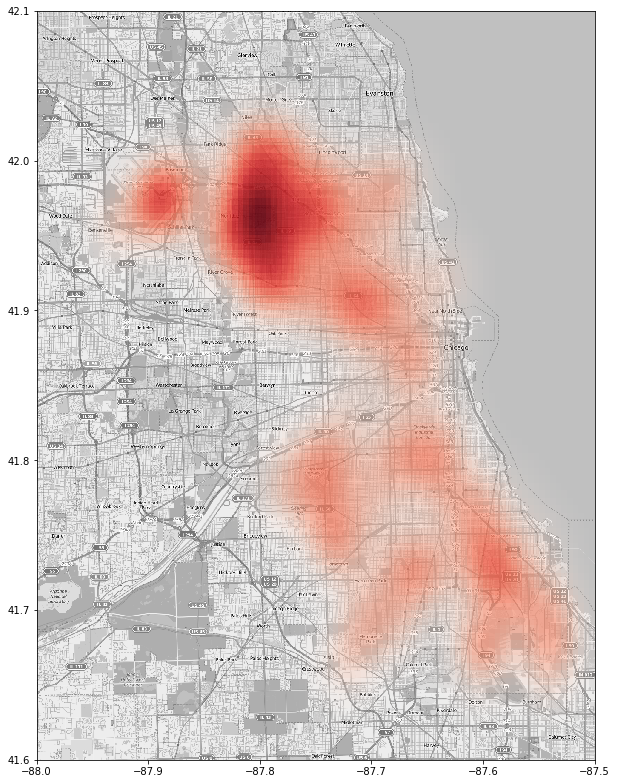

In [28]:
xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)
plt.imshow(zv, 
           origin='lower', 
           cmap=alpha_cm, 
           extent=lon_lat_box, 
           aspect=aspect)

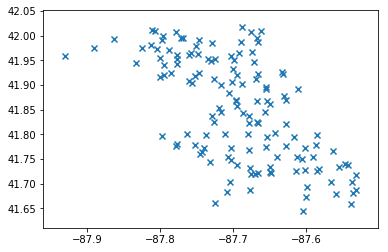

In [30]:
locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')

plt.savefig('heatmap.png')